In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display(img, cmap = None):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

def to255(num, val):
    x = (num*255)//val
    return x

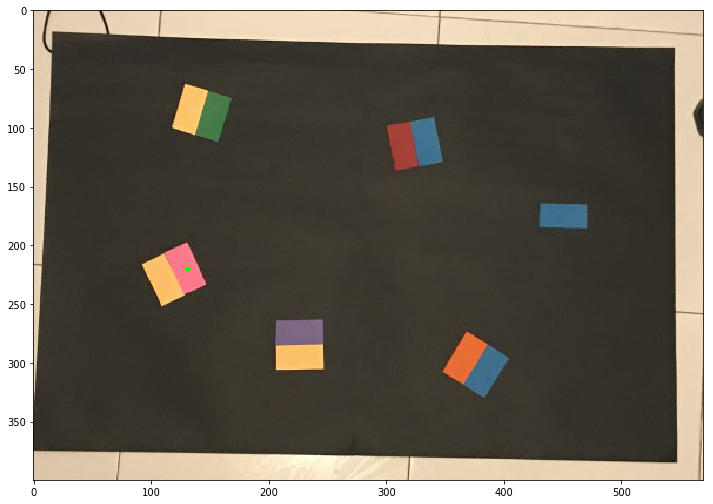

In [8]:
img = cv2.imread('C:/Users/jprr2/Videos/Logitech/LogiCapture/cancha.jpg')
cancha = img[280:680, 360:930, :]
rgb_img = cv2.cvtColor(cancha, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(cancha, cv2.COLOR_BGR2HSV)

kernel = np.ones(shape = (4,4), dtype = np.uint8)

boundaries = [
        ([to255(20,360), to255(40,100), to255(60,100)], [to255(65,360), to255(100,100), to255(100,100)]),     #AMARILLO
        ([to255(100,360), to255(35,100), to255(40,100)], [to255(160,360), to255(100,100), to255(100,100)]),   #AZUL
        ([to255(10,360), to255(50,100), to255(55,100)], [to255(35,360), to255(98,100), to255(98,100)]),       #NARANJA
        ([to255(0,360), to255(55,100), to255(50,100)], [to255(10,360), to255(100,100), to255(80,100)]),       #ROJO
        ([to255(60,360), to255(30,100), to255(10,100)], [to255(120,360), to255(100,100), to255(100,100)]),    #VERDE
        ([to255(180,360), to255(0,100), to255(0,100)], [to255(240,360), to255(70,100), to255(70,100)]),       #MORADO
        ([to255(200,360), to255(20,100), to255(75,100)], [to255(360,360), to255(100,100), to255(100,100)]),   #ROSA
        ]

lower = np.array(boundaries[6][0], dtype = "uint8")
upper = np.array(boundaries[6][1], dtype = "uint8")

mask = cv2.inRange(hsv_img, lower, upper)
result = cv2.bitwise_and(rgb_img, rgb_img, mask = mask)
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 25, 255, cv2.THRESH_BINARY)

eroded = cv2.erode(thresh, kernel, iterations = 1)
dilated = cv2.dilate(eroded, kernel, iterations = 2)

image, contours, hierarchy = cv2.findContours(dilated, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

if len(contours) != 0:
    area = max(contours, key = cv2.contourArea)

conv_hull = cv2.convexHull(area)

top    = tuple(conv_hull[conv_hull[:,:,1].argmin()][0])
bottom = tuple(conv_hull[conv_hull[:,:,1].argmax()][0])
left   = tuple(conv_hull[conv_hull[:,:,0].argmin()][0])
right  = tuple(conv_hull[conv_hull[:,:,0].argmax()][0])

cX = (left[0] + right[0]) // 2
cY = (top[1] + bottom[1]) // 2

cv2.circle(rgb_img, (cX, cY), radius = 2, color = (0,255,0), thickness = -1)

display(rgb_img, "gray")